# Number Recognition

The aim of a Handwritten Digit Recognition project using the MNIST dataset and a Neural Network is to create a machine learning model capable of accurately identifying handwritten digits. The MNIST dataset is a widely-used dataset in the field of machine learning, consisting of 28x28 pixel grayscale images of handwritten digits (0 through 9).


## Import Libraries

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


## Load the train and test data

In [2]:
train_data = pd.read_csv(r"C:\Users\swani\Downloads\train.csv")
test_data = pd.read_csv(r"C:\Users\swani\Downloads\test.csv")


train_data



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [24]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocess the Data

We want to normalize the pixel values of the image data. Normalization involves scaling the pixel values to a standard range, typically between 0 and 1. In this case, the pixel values are divided by 255.0, which is the maximum pixel value in grayscale images. This normalization process helps in ensuring that the model can converge faster during training and improves the overall stability and performance of the neural network.

In [5]:
X_train = train_data.drop('label', axis=1) / 255.0  # Normalize pixel values
y_train = train_data['label']
X_test = test_data / 255.0  

## Split the data into training and validation sets

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


## Display Sample Images

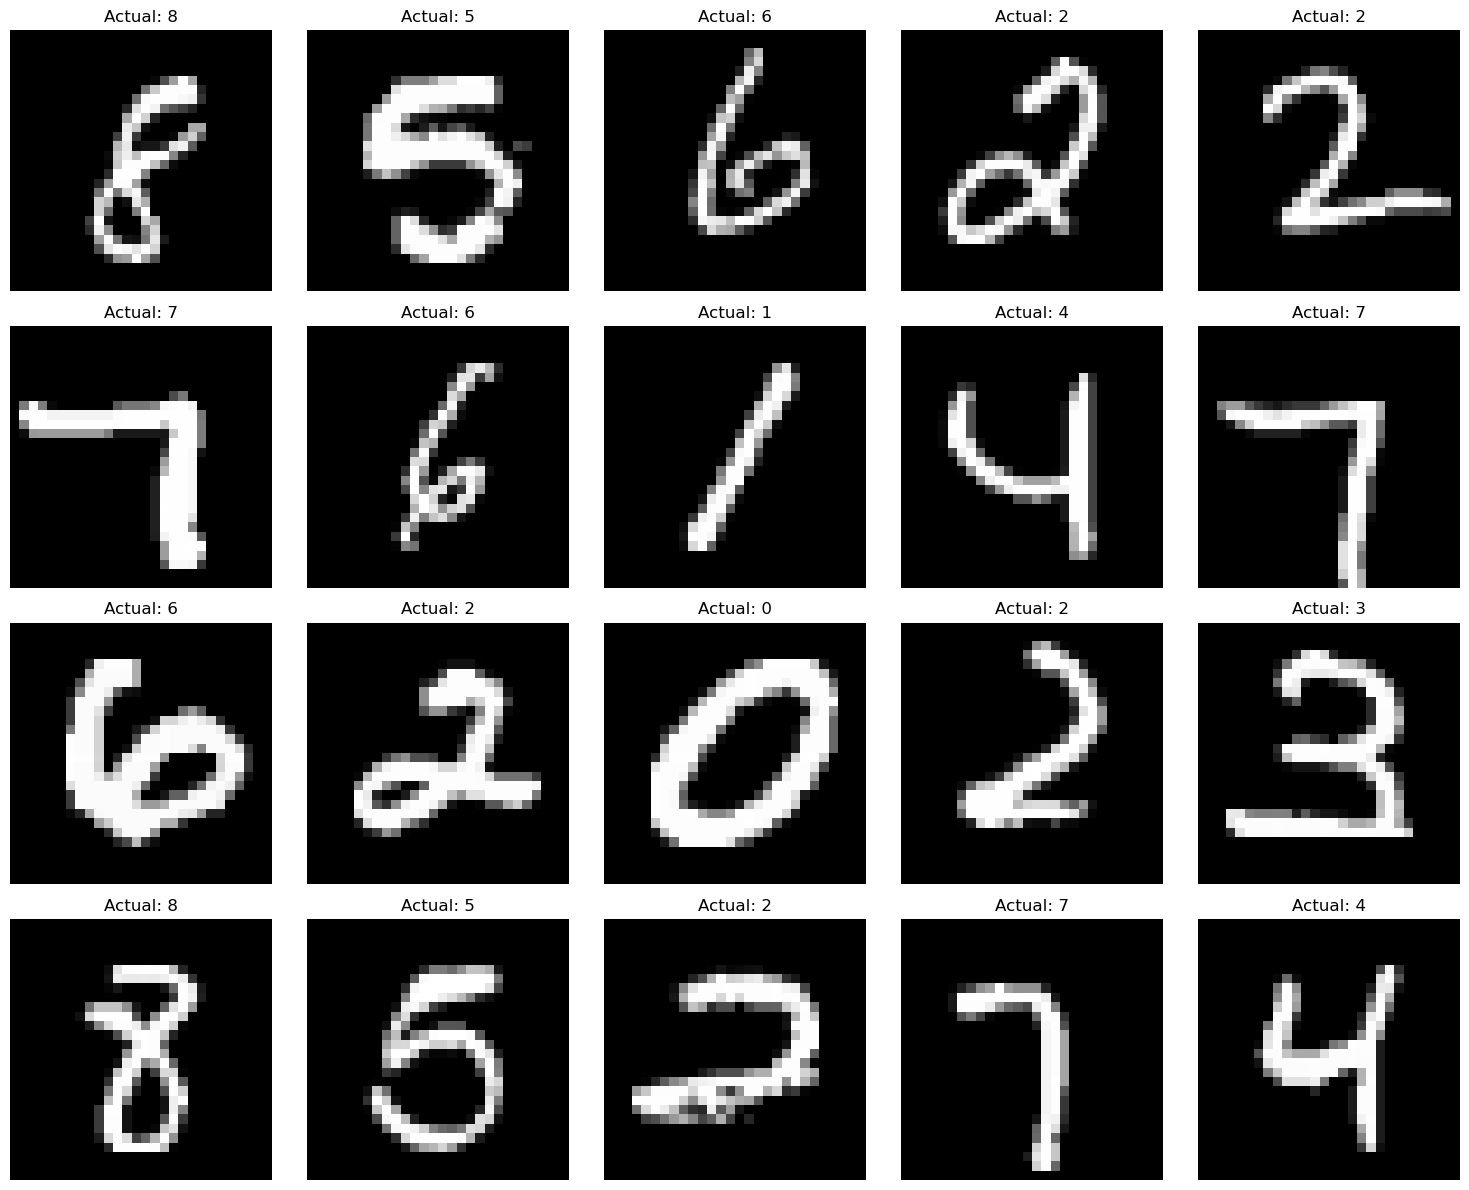

In [7]:
num_rows = 4
num_columns = 5
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 12))

for i in range(num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    img = X_train.iloc[i].values.reshape(28, 28)
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].set_title(f'Actual: {int(y_train.iloc[i])}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Build the Neural Network model

Here,we want to build a Convolutional Neural Network (CNN) architecture for handwritten digit recognition on the MNIST dataset. The model consists of convolutional layers with rectified linear unit (ReLU) activation functions, batch normalization, max pooling, and dropout layers to prevent overfitting. The architecture also includes fully connected layers with ReLU activations and batch normalization. The model is compiled with the Adam optimizer and sparse categorical crossentropy loss function, suitable for multiclass classification problems. The use of batch normalization and dropout enhances the model's generalization and robustness during training.









In [8]:
 
tf.random.set_seed(1234)

# Number of classes (digits 0-9)
num_classes = 10

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        2

## Train the model

In [41]:
history=model.fit(X_train.values.reshape(-1, 28, 28), y_train, epochs=20, validation_data=(X_val.values.reshape(-1, 28, 28), y_val))


Epoch 1/20
1182/1182 [==============================] - 91s 77ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0229 - val_accuracy: 0.9938
Epoch 2/20
1182/1182 [==============================] - 89s 76ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0208 - val_accuracy: 0.9921
Epoch 3/20
1182/1182 [==============================] - 91s 77ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0232 - val_accuracy: 0.9919
Epoch 4/20
1182/1182 [==============================] - 93s 79ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0256 - val_accuracy: 0.9938
Epoch 5/20
1182/1182 [==============================] - 93s 78ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0234 - val_accuracy: 0.9936
Epoch 6/20
1182/1182 [==============================] - 92s 78ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0243 - val_accuracy: 0.9933
Epoch 7/20
1182/1182 [==============================] - 93s 79ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0252 -

## Make Predictions

In [43]:
predictions = model.predict(X_test.values.reshape(-1, 28, 28))


875/875 [==============================] - 16s 18ms/step


## Visualize Predictions

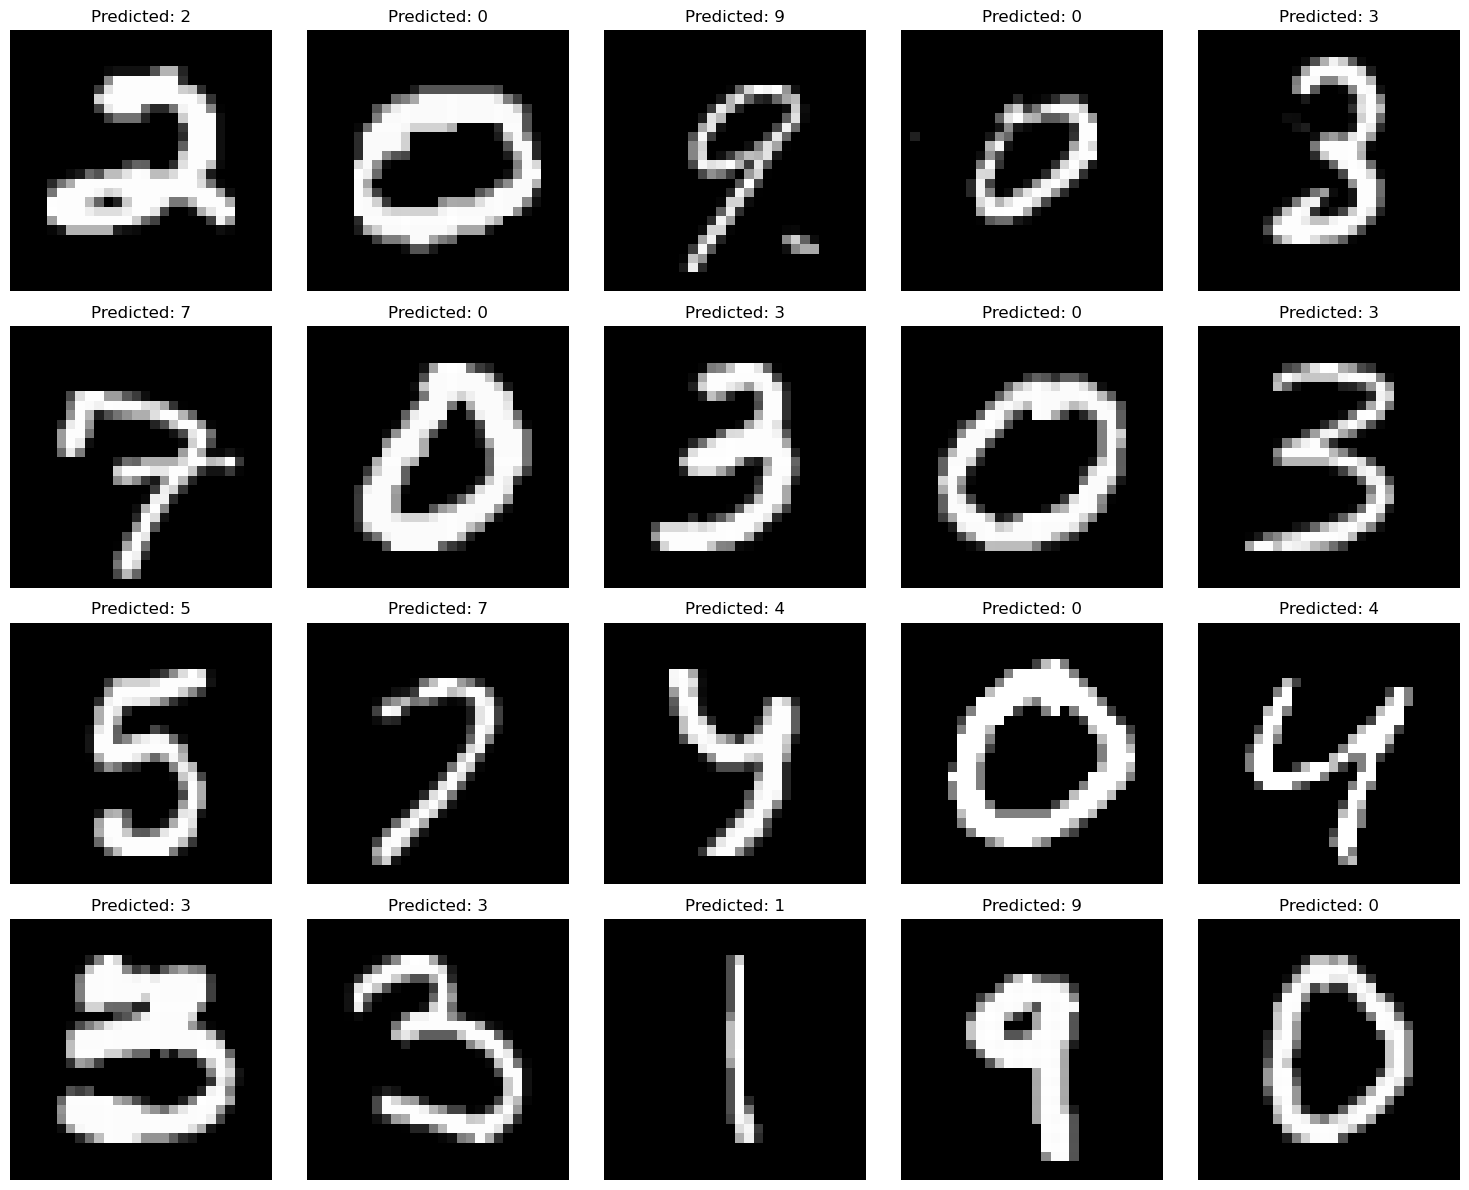

In [44]:
num_rows = 4
num_columns = 5
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 12))

for i in range(num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    img = X_test.iloc[i].values.reshape(28, 28)
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].set_title(f'Predicted: {np.argmax(predictions[i])}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Model Evaluation

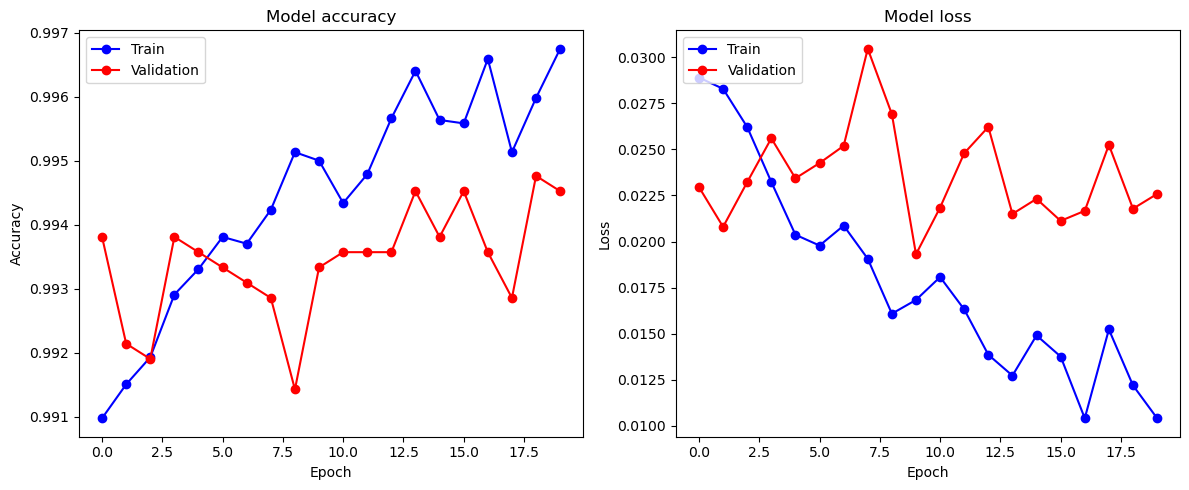

132/132 [==============================] - 2s 17ms/step - loss: 0.0226 - accuracy: 0.9945
Validation Loss: 0.0226
Validation Accuracy: 0.9945


In [45]:
# Visualize training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],'bo-')
plt.plot(history.history['val_accuracy'],'ro-')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],'bo-')
plt.plot(history.history['val_loss'],'ro-')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_val.values.reshape(-1, 28, 28), y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

The final training results indicate that the neural network achieved impressive performance on the validation set. With a low validation loss of 0.0226 and a high accuracy of 99.45%, the model effectively learned to recognize handwritten digits from the MNIST dataset. The low loss signifies the minimized difference between predicted and true labels, while the high accuracy demonstrates the model's proficiency in making correct predictions. These results suggest that the designed convolutional neural network, with its carefully chosen architecture and regularization techniques, generalizes well to unseen data, showcasing its robustness and effectiveness in the task of handwritten digit recognition. This successful outcome underscores the importance of proper model design, data preprocessing, and training strategies in achieving accurate and reliable deep learning models.






